In [8]:
import numpy as np
from matplotlib import pyplot as plt

class UserAdvert(object):
    """
    Contextual bandit environment:

    There are 3 types of advertisements and each user is represented by a
    vector. Your task is to build a contextual bandit that gives an appropriate
    action (suggests appropriate add for each user)

    The reward is the profit (in $), as a result of playing that advertisement.

    check sample.py to see how to use function
    """
    def __init__(self):
        # Set random seed
        np.random.seed(100)

        # Load data and normalize
        self.data = np.loadtxt("./RL_PA1/ads.csv", delimiter=",")
        np.random.shuffle(self.data)

        self.labels = self.data[:, 4]
        self.data = self.data[:, :4]
        self.data = self.data - self.data.mean(axis=0)
        self.data = self.data / self.data.std(axis=0)

        # Set internal variables
        self.counter = 0
        self.num = self.data.shape[0]
        self.means = [[3, 1, 1],
                      [1, 3, 1],
                      [1, 1, 3]]
        self.var = 1.0

    def getState(self):
        self.counter = (self.counter + 1) % self.num
        curData = self.data[self.counter]
        returnObject = {
            "stateVec": curData,
            "stateId": self.counter
        }
        return returnObject

    def getReward(self, stateId, action):
        """
        Get reward for performing 'action' on 'stateId'
        """
        assert(action in [0, 1, 2] and type(action) is int), \
            "Invalid action, action must be an int which is 0, 1 or 2"
        #  Add 0.2 to avoid rounding errors
        dataClass = int((self.labels[stateId]) + 0.2)
        reward = np.random.normal(self.means[dataClass][action], self.var),
        return reward[0]


Testing at: 0
Testing at: 10
Testing at: 20
Testing at: 30
Testing at: 40
Testing at: 50
Testing at: 60
Testing at: 70
Testing at: 80
Testing at: 90
Testing at: 100
Testing at: 110
Testing at: 120
Testing at: 130
Testing at: 140
Testing at: 150
Testing at: 160
Testing at: 170
Testing at: 180
Testing at: 190
Testing at: 200
Testing at: 210
Testing at: 220
Testing at: 230
Testing at: 240
Testing at: 250
Testing at: 260
Testing at: 270
Testing at: 280
Testing at: 290
Testing at: 300
Testing at: 310
Testing at: 320
Testing at: 330
Testing at: 340
Testing at: 350
Testing at: 360
Testing at: 370
Testing at: 380
Testing at: 390
Testing at: 400
Testing at: 410
Testing at: 420
Testing at: 430
Testing at: 440
Testing at: 450
Testing at: 460
Testing at: 470
Testing at: 480
Testing at: 490
Testing at: 500
Testing at: 510
Testing at: 520
Testing at: 530
Testing at: 540
Testing at: 550
Testing at: 560
Testing at: 570
Testing at: 580
Testing at: 590
Testing at: 600
Testing at: 610
Testing at: 620
Tes

Testing at: 4910
Testing at: 4920
Testing at: 4930
Testing at: 4940
Testing at: 4950
Testing at: 4960
Testing at: 4970
Testing at: 4980
Testing at: 4990
Testing at: 5000
Testing at: 5010
Testing at: 5020
Testing at: 5030
Testing at: 5040
Testing at: 5050
Testing at: 5060
Testing at: 5070
Testing at: 5080
Testing at: 5090
Testing at: 5100
Testing at: 5110
Testing at: 5120
Testing at: 5130
Testing at: 5140
Testing at: 5150
Testing at: 5160
Testing at: 5170
Testing at: 5180
Testing at: 5190
Testing at: 5200
Testing at: 5210
Testing at: 5220
Testing at: 5230
Testing at: 5240
Testing at: 5250
Testing at: 5260
Testing at: 5270
Testing at: 5280
Testing at: 5290
Testing at: 5300
Testing at: 5310
Testing at: 5320
Testing at: 5330
Testing at: 5340
Testing at: 5350
Testing at: 5360
Testing at: 5370
Testing at: 5380
Testing at: 5390
Testing at: 5400
Testing at: 5410
Testing at: 5420
Testing at: 5430
Testing at: 5440
Testing at: 5450
Testing at: 5460
Testing at: 5470
Testing at: 5480
Testing at: 54

Testing at: 9740
Testing at: 9750
Testing at: 9760
Testing at: 9770
Testing at: 9780
Testing at: 9790
Testing at: 9800
Testing at: 9810
Testing at: 9820
Testing at: 9830
Testing at: 9840
Testing at: 9850
Testing at: 9860
Testing at: 9870
Testing at: 9880
Testing at: 9890
Testing at: 9900
Testing at: 9910
Testing at: 9920
Testing at: 9930
Testing at: 9940
Testing at: 9950
Testing at: 9960
Testing at: 9970
Testing at: 9980
Testing at: 9990
[1.746914949626709, 2.2091371718489308, 2.3335816162933756, 2.3691371718489314, 2.3913593940711535, 2.4002482829600424, 2.4313593940711535, 2.440248282960043, 2.4358038385155982, 2.4402482829600425, 2.453581616293376, 2.449137171848932, 2.4624705051822646, 2.458026060737821, 2.4802482829600416, 2.49802606073782, 2.4891371718489306, 2.5069149496267085, 2.5158038385155974, 2.5069149496267085, 2.5069149496267085, 2.5069149496267085, 2.5069149496267085, 2.506914949626709, 2.515803838515598, 2.5202482829600426, 2.502470505182264, 2.502470505182264, 2.502470

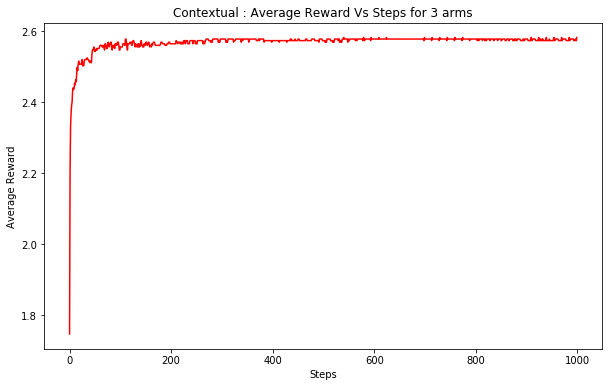

In [33]:
import numpy as np
# from ads import UserAdvert

ACTION_SIZE = 3
STATE_SIZE = 4
TRAIN_STEPS = 10000 # Change this if needed
LOG_INTERVAL = 10


def learnBandit():
    env = UserAdvert()
    rew_vec = []

    W = np.zeros([4,3])
    alpha = 0.1
    for train_step in range(TRAIN_STEPS):
        state = env.getState()
        stateVec = state["stateVec"] # the representation of the person given to us
        stateId = state["stateId"]   # the bandit that idealy must be selected
        
        # ---- UPDATE code below ------j
        
        # Sample from policy = softmax(stateVec X W) [W learnable params]
        # policy = function (stateVec)           
        '''
        Here we are learning to select an action based on the state that we are in as per the policy.
        The state here is the person that visits our site.
        
        Softmax says the probability of selecting an action based on the state that we are in.
        '''
        
        prefs = np.dot(stateVec, W)                          # The preferences of each action
        policy = np.exp(prefs)/np.sum(np.exp(prefs))           # The probabilities of selecting each arm
        action = int(np.random.choice(range(3), p = policy)) # add probability of taking each action
        reward = env.getReward(stateId, action)
        # ----------------------------

        # ---- UPDATE code below ------
        # Update policy using reward
        '''
        One possibility maybe pseudo inverse.
        Here we dont no the true reward, so we cannot calculate loss but by expectation we can expect what 
        might we the reward so we differentiate that and update weights.
        '''
        
        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                if j == action:
                    W[i,j] = W[i,j] + alpha*reward*policy[action]*(1-policy[action])*stateVec[i]
                else:
                    W[i,j] = W[i,j] - alpha*reward*policy[action]*policy[j]*stateVec[i]
        
        # policy = [1/3.0, 1/3.0, 1/3.0]
        # ----------------------------
        # print(policy)
        if train_step % LOG_INTERVAL == 0:
            print("Testing at: " + str(train_step))
            count = 0
            test = UserAdvert()
            for e in range(450):
                teststate = test.getState()
                testV = teststate["stateVec"]
                testI = teststate["stateId"]
                # ---- UPDATE code below ------
                # Policy = function(testV)
                prefs = np.dot(testV, W)
                policy = np.exp(prefs)/np.sum(np.exp(prefs))
                # policy = [1/3.0, 1/3.0, 1/3.0]
                # ----------------------------
#                 print(policy)
                act = int(np.random.choice(range(3), p=np.squeeze(policy)))
                reward = test.getReward(testI, act)
                count += (reward/450.0)
            rew_vec.append(count)

    # ---- UPDATE code below ------
    # Plot this rew_vec list
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    
    fig1.plot(range(len(rew_vec)), rew_vec, 'r')

    fig1.title.set_text('Contextual : Average Reward Vs Steps for 3 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
#     fig1.set_ylim(-0.5,1.6)
#     fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    print(rew_vec)


if __name__ == '__main__':
    learnBandit()


In [30]:
st = [1,2,3,4]
st = np.expand_dims(st, 0)
np.linalg.pinv(st)

array([[0.03333333],
       [0.06666667],
       [0.1       ],
       [0.13333333]])

In [41]:
w[0:, 0] = w[0:, 0] + np.squeeze(np.linalg.pinv(st))
w[0:, 1] = w[0:, 1] + np.squeeze(np.linalg.pinv(st))
w[0:, 2] = w[0:, 2] + np.squeeze(np.linalg.pinv(st))


In [13]:
print(w.shape)
print(w.reshape(-1,1).shape)
print(w.shape)

(4, 3)
(12, 1)
(4, 3)
